# Homework 2
#### EE-556 Mathematics of Data - Fall 2024

This homework covers Lectures 8-12. Please take a look at the material for the context and notation.

In this homework we will study minimax problems. We will begin with some theoretical analysis and in a second part you will implement a Wasserstein Generative Adversarial Network (WGAN). 

These notebooks should expose you to the fundamentals of GAN training at a basic level, as well as some of the theory behind it.

## 1. Minimax problems - 65 points

### 1.1 Theoretical recap: stationary points and convergence in minmax games - 25 points

Consider a stylized function $f: \mathbb{R}^2 \to \mathbb{R}$, such that we have $f(x, y)=(ax-b)(ay-c)$ for some $a \neq 0,b,c$.

__(1)__ (5 points) Write down the first-order stationary points of $f$, and
        classify them as local minimum, local maximum, or saddle point by
        inspecting its Hessian.




**ANSWER:** 

The partial derivatives are:
$$
\frac{\partial f}{\partial x} = a(ay-c)
$$
$$
\frac{\partial f}{\partial y} = a(ax-b)
$$

Setting these to zero, we get:
$$
a(ay-c) = 0 \implies y = \frac{c}{a}
$$
$$
a(ax-b) = 0 \implies x = \frac{b}{a}
$$

So, the stationary point is $(x^\star, y^\star) = \left(\frac{b}{a}, \frac{c}{a}\right)$.

The Hessian matrix is given by:
$$
H = \begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}
$$



So, the Hessian matrix is:
$$
H = \begin{bmatrix}
0 & a^2 \\
a^2 & 0
\end{bmatrix}
$$

The eigenvalues of $H$ are $\pm a^2$. Since the eigenvalues have opposite signs, the Hessian is indefinite, and the stationary point $\left(\frac{b}{a}, \frac{c}{a}\right)$ is a saddle point.


__(2)__ (5 points) Find the solution $(x^\star,y^\star)$ to the
        minimax problem $\min_x \max_y f(x, y)$. You can quantify the solution
        by using the following saddle point inequality:  $f(x^\star, y^\star)
        \geq f(x^\star, y)$ and $f(x^\star, y^\star) \leq f(x, y^\star)$, for
        all $x, y$.
        
**HINT:** $(x^\star, y^\star)$ can only be one of the critical points you found in (1), just evaluate $f$ at every place in the inequalities to check the optimality!




**ANSWER:**

Evaluating $f$ at the stationary point:
$$
f\left(\frac{b}{a}, \frac{c}{a}\right) = \left(a \frac{b}{a} - b\right)\left(a \frac{c}{a} - c\right) = (b - b)(c - c) = 0.
$$

We need to verify the saddle point inequality:
1. For $f(x^\star, y)$:
$$
f\left(\frac{b}{a}, y\right) = \left(a \frac{b}{a} - b\right)(ay - c) = 0 \cdot (ay - c) = 0.
$$

2. For $f(x, y^\star)$:
$$
f\left(x, \frac{c}{a}\right) = (ax - b)\left(a \frac{c}{a} - c\right) = (ax - b) \cdot 0 = 0.
$$

Then:
$$
f\left(\frac{b}{a}, \frac{c}{a}\right) = 0 \geq 0 = f\left(\frac{b}{a}, y\right) \quad \text{and} \quad f\left(\frac{b}{a}, \frac{c}{a}\right) = 0 \leq 0 = f\left(x, \frac{c}{a}\right).
$$

Therefore, the solution to the minimax problem is $(x^\star, y^\star) = \left(\frac{b}{a}, \frac{c}{a}\right)$.


__(3)__ (15 points) One possible attempt at finding this solution via iterative
        first-order methods is to perform gradient updates on the variables $x$
        and $y$. More precisely for $\gamma > 0$ consider the simultaneous gradient
        descent/ascent updates
        
\begin{equation}
    x_{k+1} = x_k - \gamma \nabla_x f(x_k, y_k), \qquad
    y_{k+1} = y_k + \gamma \nabla_y f(x_k, y_k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x_k, y_k \}_{k=0}^\infty$ starting
from any point $(x_0, y_0) \neq (x^\star, y^\star)$ diverges, for any $\gamma > 0$.
Find the rate at which the distance from 
$(x^\star,y^\star)$ to the sequence $\{x_k, y_k \}$ grows as the number of iterations $k$ increases.

**HINT:** Define $d_k^2=||(x_k,y_k)-(x^\star, y^\star)||_2^2$ as the sequence of squared distances to the optimum. If you find a formula for how $d_{k+1}$ depends on $d_k$ using the exact gradient updates for our $f$, you can easily argue for the divergence and the rate.

**ANSWER:**

$ d_k^2= ||(x_k,y_k)-(x^\star, y^\star)||_2^2 = x_k^2 + {x^\star}^2 - 2x^\star x_k + y_k^2 + {y^\star}^2 - 2y^\star y_k$ 

$d_{k+1}^2$ is given by: 
$$
d_{k+1}^2 = ||(x_{k+1},y_{k+1})-(x^\star, y^\star)||_2^2 = ||(x_k - \gamma \nabla_x f(x_k, y_k), y_k + \gamma \nabla_y f(x_k, y_k))-(x^\star, y^\star)||_2^2
$$

let $\eta = \gamma \nabla_x f(x_k, y_k) \text{ and } \zeta = \gamma \nabla_y f(x_k, y_k)$

Then:
$$
d_{k+1}^2 = ||(x_k - \eta, y_k + \zeta)-(x^\star, y^\star)||_2^2 = (x_k - \eta)^2 + {x^\star}^2 - 2x^\star (x_k - \eta) + (y_k + \zeta)^2 + {y^\star}^2 - 2y^\star (y_k + \zeta)
$$
$$
= x_k^2 - 2x_k \eta + \eta^2 + {x^\star}^2 - 2x^\star x_k + 2x^\star \eta + y_k^2 + 2y_k \zeta + \zeta^2 + {y^\star}^2 - 2y^\star y_k - 2y^\star \zeta
$$
$$
= d_k^2 + \eta^2 + \zeta^2 - 2x_k \eta  + 2x^\star \eta + 2y_k \zeta  - 2y^\star \zeta
$$

Now we substitute back $\eta$, $\zeta$, $x^\star = b/a$ and $y^\star = c/a$:
$$
\Rightarrow d_{k+1}^2 = d_k^2 + \eta^2 + \zeta^2 - 2x_k \gamma \nabla_x f(x_k, y_k) + 2 \frac{b}{a} \gamma \nabla_x f(x_k, y_k) + 2y_k \gamma \nabla_y f(x_k, y_k) - 2 \frac{c}{a} \gamma \nabla_y f(x_k, y_k)
$$
$$
= d_k^2 + \eta^2 + \zeta^2 + 2 \gamma  \left(\frac{b}{a} \nabla_x f(x_k, y_k) - x_k \nabla_x f(x_k, y_k) + y_k \nabla_y f(x_k, y_k) - \frac{c}{a} \nabla_y f(x_k, y_k)\right)
$$

Finally we substitute $\nabla_x f(x_k, y_k) = a(ay_k - c)$ and $\nabla_y f(x_k, y_k) = a(ax_k - b)$: 
$$
\Rightarrow d_{k+1}^2 = d_k^2 + \eta^2 + \zeta^2 + 2 \gamma a (-x_k y_k a +y_k x_k a + x_k c - y_k b - x_k c + y_k b)
$$
$$
= d_k^2 + \eta^2 + \zeta^2 + 2 \gamma a (0)
$$

Since we sum positive terms to $d_k^2$, the sequence $\{x_k, y_k \}_{k=0}^\infty$ diverges.


__(Optional $\star$)__ A second attempt at finding the solution via _alternating_ gradient descent ascent on $x$
        and $y$. More precisely for $\gamma > 0$ consider the update
        
\begin{equation}
    x_{k+1} = x_k - \gamma \nabla_x f(x_k, y_k), \qquad
    y_{k+1} = y_k + \gamma \nabla_y f(x_{k+1}, y_k) \nonumber
\end{equation}
Show that the sequence of iterates $\{x_k, y_k \}_{k=0}^\infty$ starting
from any point $(x_0, y_0) \neq (x^\star, y^\star)$ i) never converges, ii) but still remains bounded under certain stepsize conditions.

**HINT**: Reduce the problem to studying a linear system.




Let us set $\delta x_k = x_k - x^*$ and $\delta y_k = y_k - y^*$
\begin{align}
    \begin{cases}
      x_{k+1} = x_k - \gamma \nabla _x f(x_k, y_k) \\
      y_{k+1} = y_k + \gamma \nabla _x f(x_{k+1}, y_k)
    \end{cases} &<=>
    \begin{cases}
      x_{k+1} = x_k - \gamma a (a y_k - c) \\
      y_{k+1} = y_k + \gamma a (a x_{k+1} - b)
    \end{cases} \\ &<=>
    \begin{cases}
      x_{k+1} = \delta x_k + x^* - \gamma a (a (\delta y_k + y^*) - c) \\
      y_{k+1} = \delta y_k + y^* + \gamma a (a x_{k+1} - b)
    \end{cases} \\ &<=>
    \begin{cases}
      x_{k+1} = x_k + \delta x_k - \gamma a^2 \delta y_k \\
      y_{k+1} = y_k + \delta y_k + \gamma a ( a x_k + a \delta x_k - \gamma a^3 \delta y_k- b)
    \end{cases} \\ &<=>
    \begin{cases}
      x_{k+1} = x_k + \delta x_k - \gamma a^2 \delta y_k \\
      y_{k+1} = y_k + \delta y_k + \gamma a^2 ( \delta x_k - \gamma a^2 \delta y_k)
    \end{cases} 
\end{align}

Thus
\begin{equation}
\boxed{
    \begin{cases}
      \delta x_{k+1} = \delta x_k - \gamma a^2 \delta y_k \\
      \delta y_{k+1} = \gamma a^2 \delta x_k + (1 - \gamma^2 a^4 ) \delta y_k 
    \end{cases} 
    }
\end{equation}

Let us rewrite this system of equation in matrix form 

\begin{equation}
\begin{bmatrix}
\delta x_{k+1} \\
\delta y_{k+1}
\end{bmatrix}
= 
\begin{bmatrix}
1 & - \gamma a^2\\
\gamma a^2 & 1-\gamma^2 a^4
\end{bmatrix}
\begin{bmatrix}
\delta x_{k} \\
\delta y_{k}
\end{bmatrix}
\end{equation}

Let us denote A this matrix. We now find its eigenvalues:
$$det(A - \lambda I) = \lambda^2 + ( \gamma^2 a^4 - 2) \lambda + 1$$
Thus we get $$\lambda = \frac{2 - \gamma^2 a^4 \pm \gamma a^2 \sqrt{\gamma^2 a^4 - 4}}{2}$$

We have to distinguish 3 cases. 

$\textbf{Case 1:}$  $\gamma^2 a^4 - 4 > 0$

Then the eigenvalue $\lambda_{-} = \frac{2 - \gamma^2 a^4 - \gamma a^2 \sqrt{\gamma^2 a^4 - 4}}{2} < -1$. Hence 
$$| \lambda_{-} | > 1$$
At least one eigenvalue is has absolute value greater than 1, thus the iteration will diverge.

$\textbf{Case 2:}$  $\gamma^2 a^4 - 4 = 0$

Then the eigenvalue $\lambda = -1$. 
The iteration oscillates indefinitely without converging and does not lead to decay in the sequence.

$\textbf{Case 3:}$  $\gamma^2 a^4 - 4 < 0$ 

Then
$$\lambda_{\pm} = \frac{2 - \gamma^2 a^4}{2} \pm i \frac{\gamma a^2 \sqrt{4 - \gamma^2 a^4 }}{2}$$
Thus $$ |\lambda_{\pm}|^2 = \left(\frac{2 - \gamma^2 a^4}{2} \right)^2 + \left( \frac{\gamma a^2 \sqrt{4 - \gamma^2 a^4 }}{2} \right)^2 = 1$$
Same as previously, the iteration will oscillate indefinitely without converging.

In all cases, the sequence of iterates never converges. However, the sequence of iterates remains bounded in cases 2 and 3. Hence, the sequence is bounded if
$$\boxed{\gamma^2 a^4 \leq 4 <=> \gamma a^2 \leq 2}$$

### 1.2 A concrete example: Rock - Paper - Scissors - Lizard - Spock - 40 points

To make your previous abstract analysis more concrete, we will now look at the iconic Rock-Paper-Scissors-Lizard-Spock game. Sheldon and Leonard always like to settle their differences through a round of this game, whose rules they state as follows:

*"Scissors cuts Paper, Paper covers Rock, Rock crushes Lizard, Lizard poisons Spock, Spock smashes Scissors, Scissors decapitates Lizard, Lizard eats Paper, Paper disproves Spock, Spock vaporizes Rock, (and as it always has) Rock crushes Scissors"*

Sheldon and Leonard always pick to play Spock because "logic trumps all", it will be your task to show that this is not the optimal strategy.

We can formalize the game as follows. There are two players, the `x` player (e.g. Sheldon) and the `y` player (e.g. Leonard). There is only one single round. The players play a randomized strategy: each player chooses a probability of playing rock/paper/scissors/lizard/Spock. We look at the expected pay-off of these randomized strategies. 

In other words, the players choose an element in $\Delta_5$ the probability simplex in dimension 5. The `x` player chooses a vector $\mathbf{x} = \begin{bmatrix} \mathbf{x}_1 & \mathbf{x}_2 & \mathbf{x}_3 & \mathbf{x}_4 & \mathbf{x}_5 \end{bmatrix} \in \Delta_5$ where $\mathbf{x}_1$ is the probability of playing `Rock`, $\mathbf{x}_2$ is the probability of playing `Paper`, $\mathbf{x}_3$ is the probability of playing `Scissors`, $\mathbf{x}_4$ is the probability of playing `Lizard`, $\mathbf{x}_5$ is the probability of playing `Spock`. The `y` player chooses a vector $\mathbf{y} \in \Delta_5$ defined in the same way. 

The game designers decide that winning the game gives 1 point and a tie gives 0 points. So the expected payoff for a give choice of strategies $\mathbf{x}, \mathbf{y}$ is obtained by computing:
$$
\mathbf{x}^\top \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}\mathbf{y}
$$

The `x` player wants to minimize this expected payoff and the `y` player wants to maximize it. So the problem we seek to solve is

$$
\min_{\mathbf{x} \in \Delta_5} \max_{\mathbf{y} \in \Delta_5} \mathbf{x}^\top \mathbf{M}\mathbf{y} =: f(\mathbf{x}, \mathbf{y})
$$
with $\mathbf{M} = \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}$.

In the following cells, you will implement methods to solve this game and find the optimal strategies.

In [17]:
import torch
from ipywidgets import interact, SelectionSlider, fixed
from itertools import combinations
from scipy.stats import entropy
from lib.utils import *

**(1)** (2 points) Implement the objective function $f$ given two 3 dimensional vectors `x` and `y` stored as `torch.Tensor` objects.

$\mathbf{M} = \begin{bmatrix} 0 & 1 & -1 & -1 & 1 \\ -1 & 0 & 1 & 1 & -1 \\ 1 & -1 & 0 & -1 & 1 \\ 1 & -1 & 1 & 0 & -1 \\ -1 & 1 & -1 & 1 & 0 \end{bmatrix}$.

In [18]:
M = torch.tensor([
    [0, 1, -1, -1, 1],
    [-1, 0, 1, 1, -1],
    [1, -1, 0, -1, 1],
    [1, -1, 1, 0, -1],
    [-1, 1, -1, 1, 0]
    ], dtype= torch.float32)
def f(x: torch.Tensor, y: torch.Tensor):
    return torch.matmul(x, torch.matmul(M, y)) # we can use M since is global


**(2)** (10 points) Implement a single step of the simultaneous gradient descent/ascent studied in question 1.1.(3). Since we are in a constrained setting, make sure you include a projection step onto the simplex. 

The function `GDA` you will implement takes in the objective function `f`, the two current strategies of the players stored in tensors `x` and `y` and a step_size. Write the function so that it modifies the variables `x` and `y` in place without returning anything.

We provide you with a function called `simplex_project` that projects a vector on the probability simplex. The function has no return value and does the projection in place. Use `Pytorch` to compute gradients automatically. 

__Hints__: Review what a call to `.backward()` on a tensor does. Review what in-place operations are like `.add_`. Think of which steps need to be in a `with torch.no_grad()` block. Remember to zero the gradients before re-using them.

In [19]:
def GDA(f, x, y, step_size):
    payoff = f(x, y)
    x.requires_grad = True
    y.requires_grad = True
    payoff.backward()

    with torch.no_grad():
        x -= step_size * x.grad
        y += step_size * y.grad

        simplex_project(x)
        simplex_project(y)
        
        x.grad.zero_()
        y.grad.zero_()

    

We can run this algorithm initialized from Sheldon and Leonard's strategies of always playing Spock.

In [34]:
x_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])
y_init = torch.tensor([0.0, 0.0, 0.0, 0.0, 1.0])

gda_x_sequence, gda_y_sequence = run_alg(GDA, f, x_init, y_init, step_size=0.05, n_iterations=3000)

We can visualize this sequence as ${4 \choose 2} = 6$ two dimensional slices since the simplex $\Delta_5$ is 4-dimensional.

In [35]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(gda_x_sequence[:, dim_pairs[dim_pair]], 
                  gda_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

To have plots that aggregate the convergence status over all 5 dimensions at the same time, let's also visualize:

- the duality gap over time: $g_k = \max_{\mathbf{y} \in \Delta_5}{f(\mathbf{x}_k,\mathbf{y})} - \min_{\mathbf{x} \in \Delta_5}{f(\mathbf{x},\mathbf{y}_k)} = \max_{i}{(\mathbf{M}^\top \mathbf{x}_k)_i} - \min_{i}{(\mathbf{M} \mathbf{y}_k)_i}$
- the distance to the optimum over time: $d_k=\sqrt{||\mathbf{x}_k-\mathbf{x}^\star||_2^2 + ||\mathbf{y}_k-\mathbf{y}^\star||_2^2}$
- the discrete entropy over time of the x and y strategies (we can do this since they are probability distributions): $H(\mathbf{x}_k)=-\sum_{i=1}^{5}{\mathbf{x}_k^{(i)}\log{\mathbf{x}_k^{(i)}}}, H(\mathbf{y}_k)=-\sum_{i=1}^{5}{\mathbf{y}_k^{(i)}\log{\mathbf{y}_k^{(i)}}}$

In [22]:
def distance_to_opt(L_x, L_y):
    return np.sqrt(np.sum((L_x - 0.2) ** 2 + (L_y - 0.2) ** 2, axis=1))

In [23]:
def duality_gap(L_x, L_y):
    return (np.max(M.numpy().T.reshape(1, 5, 5) @ L_x.reshape(-1, 5, 1), axis=(1, 2)) 
            - np.min(M.numpy().reshape(1, 5, 5) @ L_y.reshape(-1, 5, 1), axis=(1, 2)))

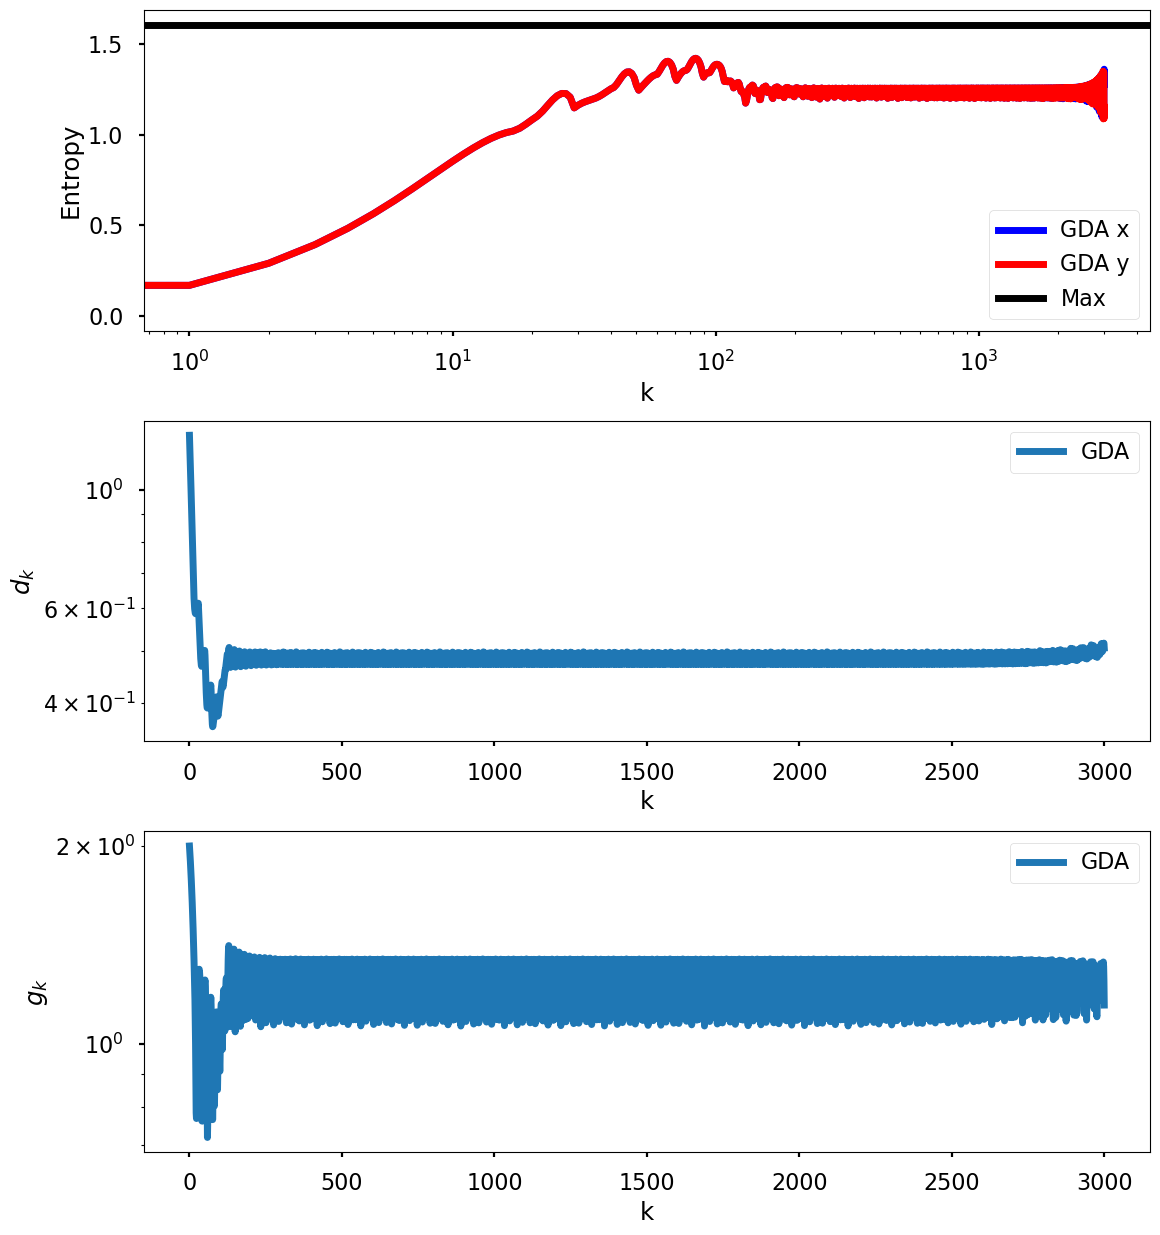

In [36]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', label="GDA y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(3)** (3 point) What kind of behavior do you observe ? Do the iterates converge ? Play with the step_size and the number of iterations.




**ANSWER:**

The optimal point is : $\mathbf{x^\star} = \begin{bmatrix} 0.2 & 0.2 & 0.2 & 0.2 & 0.2 \end{bmatrix}$ and $\mathbf{y^\star} = \begin{bmatrix} 0.2 & 0.2 & 0.2 & 0.2 & 0.2 \end{bmatrix}$.

The gradinet descent/ascent algorithm do not converge and seem to circle around the optimal point.

**(4)** (10 points) As you've shown both theoretically and in practice, simultaneous Gradient Descent Ascent (sGDA) cannot solve the problem. You will now implement `ExtraGradient` (EG), an algorithm that can solve bilinear games. We will denote the projection onto the decision space of the x-player and y-player, $\Pi_{\mathcal X}$ and $\Pi_{\mathcal Y}$, respectively.

As discussed in class, the idea behind extra-gradient is to approximate an implicit update with a more tractable one. 

Let $\mathbf{z}_k = \begin{bmatrix} x_k \\ y_k \end{bmatrix}$, $\Pi(\mathbf{z})=\begin{bmatrix} \Pi_{\mathcal X}(x) \\ \Pi_{\mathcal Y}(y) \end{bmatrix}$ and $G(\mathbf{z}_k) = \begin{bmatrix} \nabla_x f(x_k,y_k) \\ -\nabla_y f(x_k,y_k) \end{bmatrix}$.

Consider the following implicit updates:
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{red}{\mathbf{z}_{k+1}})) \nonumber
\end{equation}

Computing the next iterate $\mathbf{z}_{k+1}$ requires you to solve a fixed point problem because we are evaluating the gradient at the unknown next iterate.  As this is too costly, we circumvent this difficulty by doing an _extrapolation_ step. Define the half steps:

\begin{equation}
    \mathbf{z}_{k+1/2} = \Pi(\mathbf{z}_k - \gamma G(\mathbf{z}_k)) \nonumber
\end{equation}

These half step extrapolation variables will help us to approximate the implicit iterates. We can then write
\begin{equation}
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k+1/2}})) \nonumber
\end{equation}
The recursion above defines the EG algorithm.


In [31]:
def ExtraGradient(f, x, y, step_size):
    payoff = f(x, y)
    x.requires_grad = True
    y.requires_grad = True
    payoff.backward()

    with torch.no_grad():
        x_half = x - step_size * x.grad
        y_half = y + step_size * y.grad
        simplex_project(x_half)
        simplex_project(y_half)
    
    x_half.requires_grad = True
    y_half.requires_grad = True
    payoff_half = f(x_half, y_half)
    payoff_half.backward()

    with torch.no_grad():
        x -= step_size * x_half.grad
        y += step_size * y_half.grad
        simplex_project(x)
        simplex_project(y)
        
        x.grad.zero_()
        y.grad.zero_()

In [32]:
eg_x_sequence, eg_y_sequence = run_alg(ExtraGradient, f, x_init, y_init, step_size=0.1, n_iterations=2500)

In [ ]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(dim_pair):
    visualize_seq(eg_x_sequence[:, dim_pairs[dim_pair]], 
                  eg_y_sequence[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
interact(visualize_seq_slice, dim_pair=SelectionSlider(
    options=range(len(dim_pairs)),
    value=0,
    description="Dim pair:",
    disabled=False,
    continuous_update=False,
    orientation="horizontal",
    readout=True
))

interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

<function __main__.visualize_seq_slice(dim_pair)>

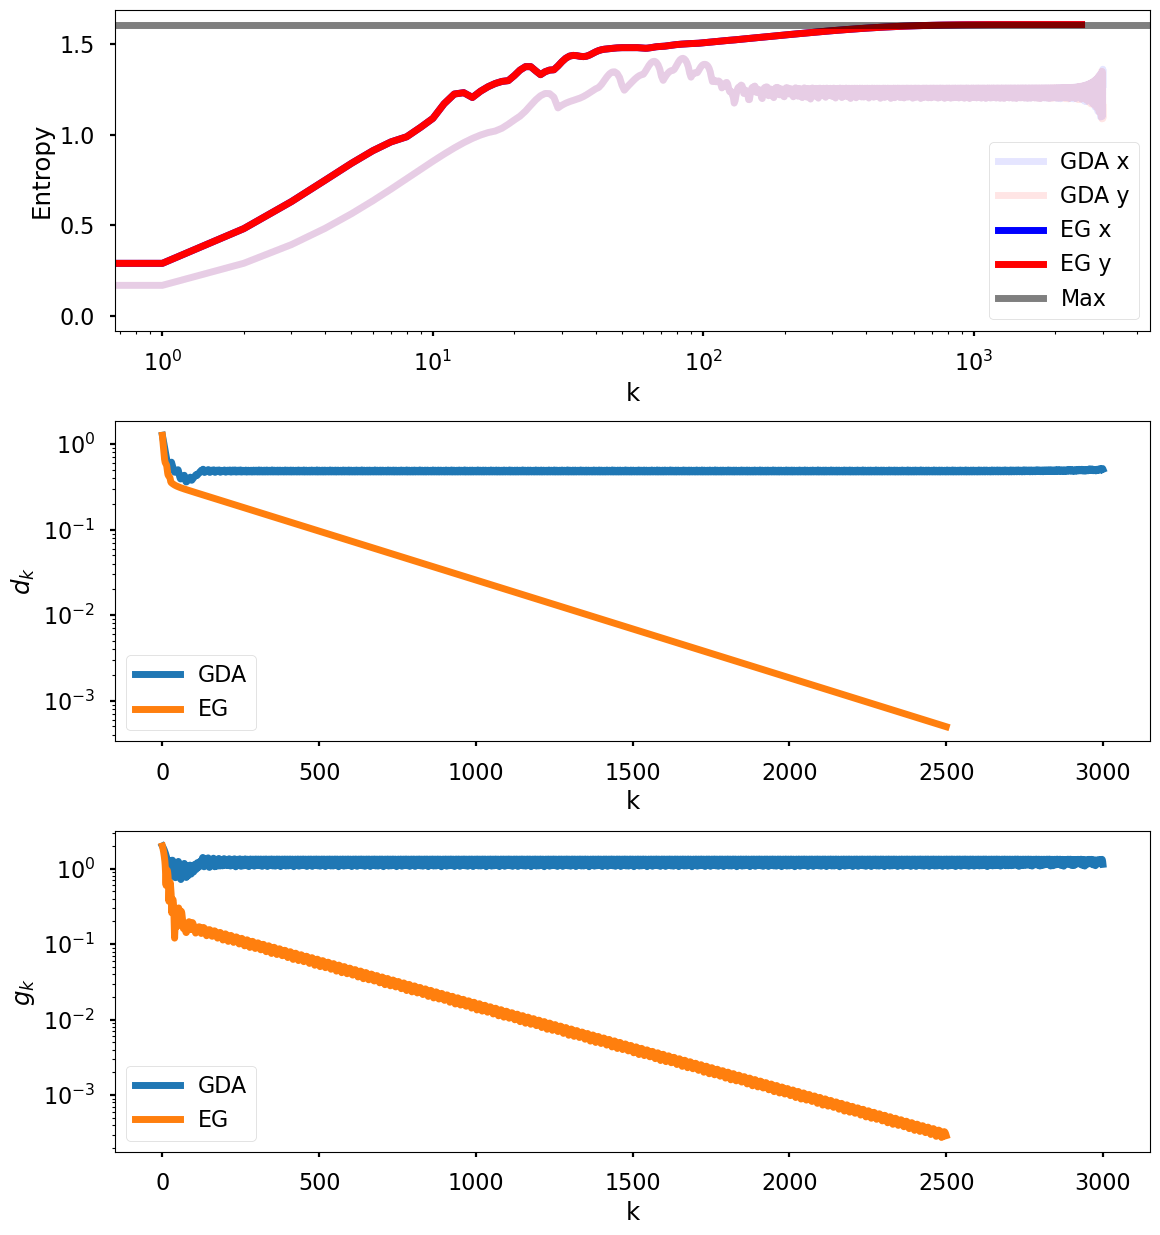

In [37]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, color='b', alpha=0.1, label="GDA x")
ax[0].plot(range(len(gda_y_sequence)), entropy(gda_y_sequence, axis=1), lw=5, color='r', alpha=0.1, label="GDA y")
ax[0].plot(range(len(eg_x_sequence)), entropy(eg_x_sequence, axis=1), lw=5, color='b', label="EG x")
ax[0].plot(range(len(eg_y_sequence)), entropy(eg_y_sequence, axis=1), lw=5, color='r', label="EG y")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[1].plot(range(len(eg_x_sequence)), distance_to_opt(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(eg_x_sequence)), duality_gap(eg_x_sequence, eg_y_sequence), lw=5, label="EG")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()

**(BONUS)** What can you observe about the optimal solution? What properties does the optimal Rock-Paper-Scissors-Lizard-Spock strategy have? Prove that extra-gradient in the bilinear case doesn't diverge like GDA. (Again, candy reward for correct answers!)




The two dimensional slice plot shows that we have convergence to a probability of 0.2 for each pair of hand. Therefore, the optimal strategy is to play 
$$x^* = y^* = \left[ 0.2 \qquad 0.2 \qquad 0.2 \qquad 0.2 \qquad 0.2 \right]$$
This corresponds to the uniform distribution. From the 3 plots, we see that it converges to the highest entropy, converges with a decreasing distance to optimum $d_k$, and decreases the duality gap with every iteration.

The best strategy is therefore to play in a randomly uniform way.  

We have 
$G = 
\begin{bmatrix}
\nabla _x f \\
- \nabla _y f 
\end{bmatrix}
=
\begin{bmatrix}
My \\
-M^T x
\end{bmatrix}
$

\begin{align}
    \begin{cases}
      x_{k+1/2} = x_k - \gamma M y_k \\
      x_{k+1/2} = y_k + \gamma M^T x_k
    \end{cases} &=>
    \begin{cases}
      x_{k+1} = x_k - \gamma (y_k + \gamma M^T x_k) \\
      y_{k+1} = y_k + \gamma (x_k - \gamma M y_k)
    \end{cases} \\ &=>
    \begin{cases}
      x_{k+1} = \delta x_k + x^* - \gamma a (a (\delta y_k + y^*) - c) \\
      y_{k+1} = \delta y_k + y^* + \gamma a (a x_{k+1} - b)
    \end{cases} \\ &=>
    \begin{cases}
      x_{k+1} = (I_5 - \gamma ^2 M M^T)x_k - \gamma M y_k \\
      y_{k+1} = \gamma M^T x_k + (I_5 - \gamma ^2 M^T M)y_k
    \end{cases} 
\end{align}
We can now write
$$ z_{k+1} = 
\begin{bmatrix}
I_5 - \gamma ^2 M M^T & - \gamma M \\
\gamma M^T & I_5 - \gamma ^2 M^T M
\end{bmatrix}
z_{k}$$

Let us note $A = \begin{bmatrix}
I_5 - \gamma ^2 M M^T & - \gamma M \\
\gamma M^T & I_5 - \gamma ^2 M^T M
\end{bmatrix}$

Using Mathematica solver, we find $$det(A - \lambda I_{10}) = (-1 + \lambda)^2 (25 \gamma^8 + (-1 + \lambda)^4 + 
   50 \gamma^6 (-1 + 2 \lambda) + 
   10 \gamma^2 (-1 + \lambda)^2 (-1 + 2 \lambda) + 
   5 \gamma^4 (19 - 40 \lambda + 22 \lambda^2))^2$$

Also with the solver, we find the following eigenvalues, each with multiplicity of 2:
$$ \lambda_1 = 1 $$ 
$$ \lambda_2 = 1 + \left(-5 - 2\sqrt{5}\right)\gamma^2 - \sqrt{5}\sqrt{-\gamma^2 - \frac{2\gamma^2}{\sqrt{5}}} $$
$$ \lambda_3 = 1 + \left(-5 - 2\sqrt{5}\right)\gamma^2 + \sqrt{5}\sqrt{-\gamma^2 - \frac{2\gamma^2}{\sqrt{5}}} $$
$$ \lambda_4 = 1 + \left(-5 + 2\sqrt{5}\right)\gamma^2 - \sqrt{5}\sqrt{-\gamma^2 + \frac{2\gamma^2}{\sqrt{5}}} $$
$$ \lambda_5 = 1 + \left(-5 + 2\sqrt{5}\right)\gamma^2 + \sqrt{5}\sqrt{-\gamma^2 + \frac{2\gamma^2}{\sqrt{5}}} $$

All eigenvalues, except the first one, are complex. Calculating their amplitudes give:
$$ |\lambda_2 |^2 = |\lambda_3 |^2 = 1 - (5 + 2\sqrt{5}) \gamma^2 + 5(9 + 4\sqrt{5}) \gamma^4$$
$$ |\lambda_4 |^2 = |\lambda_5 |^2 = 1 + (-5 + 2\sqrt{5}) \gamma^2 - 5(-9 + 4\sqrt{5}) \gamma^4$$

We find $$ |\lambda_2 |^2 = |\lambda_3 |^2 < 1 <=> \gamma < \sqrt{\frac{5 + 2\sqrt{5}}{5 \left(9 + 4\sqrt{5}\right)}} \approx 0.32492$$
$$ |\lambda_4 |^2 = |\lambda_5 |^2 < 1 <=> \gamma < \sqrt{\frac{5 - 2\sqrt{5}}{5 \left(9 - 4\sqrt{5}\right)}} \approx 1.37638$$

Hence, if we select $\gamma$ such that $$\gamma < \sqrt{\frac{5 + 2\sqrt{5}}{5 \left(9 + 4\sqrt{5}\right)}}$$
then 8 of our eigenvalues have amplitudes less than 1 and the sub-diagonalization or sub-Jordan matrix of size 8x8 will decrease with each iteration.

We now prove that eigenspace for the eigenvalue 1 is of dimension 2.
Notice that $$u_1 = \left[ 1 \qquad 1 \qquad 1 \qquad 1 \qquad 1 \qquad 0 \qquad 0 \qquad 0 \qquad 0 \qquad 0 \right]$$
and
$$u_2 = \left[ 0 \qquad 0 \qquad 0 \qquad 0 \qquad 0 \qquad 1 \qquad 1 \qquad 1 \qquad 1 \qquad 1 \right]$$
are both eigenvectors of A, for the eigenvalue 1. We have thus proven that the eigenspace corresponding to the eigenvalue 1 is of dimension 2.

Hence, the EG method in the bilinear case doesn't diverge like GDA under the condition that
$$ \boxed{\gamma < \sqrt{\frac{5 + 2\sqrt{5}}{5 \left(9 + 4\sqrt{5}\right)}}} $$

**(5)** (10 points) It turns out that we can _generalize_ the ExtraGradient method naturally by striving for a bit more accurate extrapolation. Namely, instead of always performing 1 extrapolation step updating half-iterates before the main parameter update, we can perform $m\geq 1$ fractional steps. Implement this ClairvoyantExtraGradient (CEG) method [1], with the precise update step formulas given below:

\begin{equation}
    \mathbf{z}_{k+1(\color{green}{1/m+1})} = \Pi(\mathbf{z}_k - \gamma G(\color{green}{\mathbf{z}_{k}})) \\
    \mathbf{z}_{k+1(\color{green}{2/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{1/m+1})})) \\
    \vdots \\
    \mathbf{z}_{k+1(\color{green}{m/m+1})} = \Pi(\mathbf{z}_{k+1(\color{green}{m-1/m+1})} - \gamma G(\mathbf{z}_{k+1(\color{green}{m-1/m+1})})) \\
    \mathbf{z}_{k+1} = \Pi(\mathbf{z}_k - \gamma G({\mathbf{z}_{k+1(\color{green}{m/m+1})} })) \nonumber
\end{equation}


[1] Cevher, Volkan, Georgios Piliouras, Ryann Sim, and Stratis Skoulakis. “Min-Max Optimization Made Simple: Approximating the Proximal Point Method via Contraction Maps.” In 2023 Symposium on Simplicity in Algorithms (SOSA), 192–206. Proceedings. Society for Industrial and Applied Mathematics, 2023. https://doi.org/10.1137/1.9781611977585.ch18.

In [41]:
def ClairvoyantExtraGradient(f, x, y, step_size, m=1):
    payoff = f(x, y)
    x.requires_grad = True
    y.requires_grad = True
    payoff.backward()

    x_k = x.clone().detach()
    y_k = y.clone().detach()

    for i in range(1, m+1):
        x_k.requires_grad = True
        y_k.requires_grad = True
        payoff_k = f(x_k, y_k)
        payoff_k.backward()

        with torch.no_grad():
            x_k -= step_size * x_k.grad
            y_k += step_size * y_k.grad
            simplex_project(x_k)
            simplex_project(y_k)

            x_k.grad.zero_()
            y_k.grad.zero_()

    payoff_final = f(x_k, y_k)
    payoff_final.backward()

    with torch.no_grad():
        x -= step_size * x_k.grad
        y += step_size * y_k.grad
        simplex_project(x)
        simplex_project(y)
        
        x.grad.zero_()
        y.grad.zero_()


    

In [42]:
m_values = [1, 2, 3, 5, 10, 25] # You can change this if you wish
ceg_x_sequences, ceg_y_sequences = [], []
for m in m_values:
    print("m =", m)
    step_size = 0.1 if m != 10 else 0.09 # You can change this if you wish
    ceg_x_sequence, ceg_y_sequence = run_alg(ClairvoyantExtraGradient, f, x_init, y_init, 
                                             n_iterations=2500, step_size=step_size, m=m)
    ceg_x_sequences.append(ceg_x_sequence)
    ceg_y_sequences.append(ceg_y_sequence)

m = 1
m = 2
m = 3
m = 5
m = 10
m = 25


In [43]:
dim_pairs = list(combinations(range(4), 2))
def visualize_seq_slice(L_x, L_y, dim_pair):
    visualize_seq(L_x[:, dim_pairs[dim_pair]], 
                  L_y[:, dim_pairs[dim_pair]],
                  dim_pairs[dim_pair])
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    print("m =", m)
    interact(visualize_seq_slice, L_x=fixed(ceg_x_sequence), L_y=fixed(ceg_y_sequence), dim_pair=SelectionSlider(
        options=range(len(dim_pairs)),
        value=0,
        description="Dim pair:",
        disabled=False,
        continuous_update=False,
        orientation="horizontal",
        readout=True
    ))

m = 1


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 2


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 3


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 5


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 10


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

m = 25


interactive(children=(SelectionSlider(continuous_update=False, description='Dim pair:', options=(0, 1, 2, 3, 4…

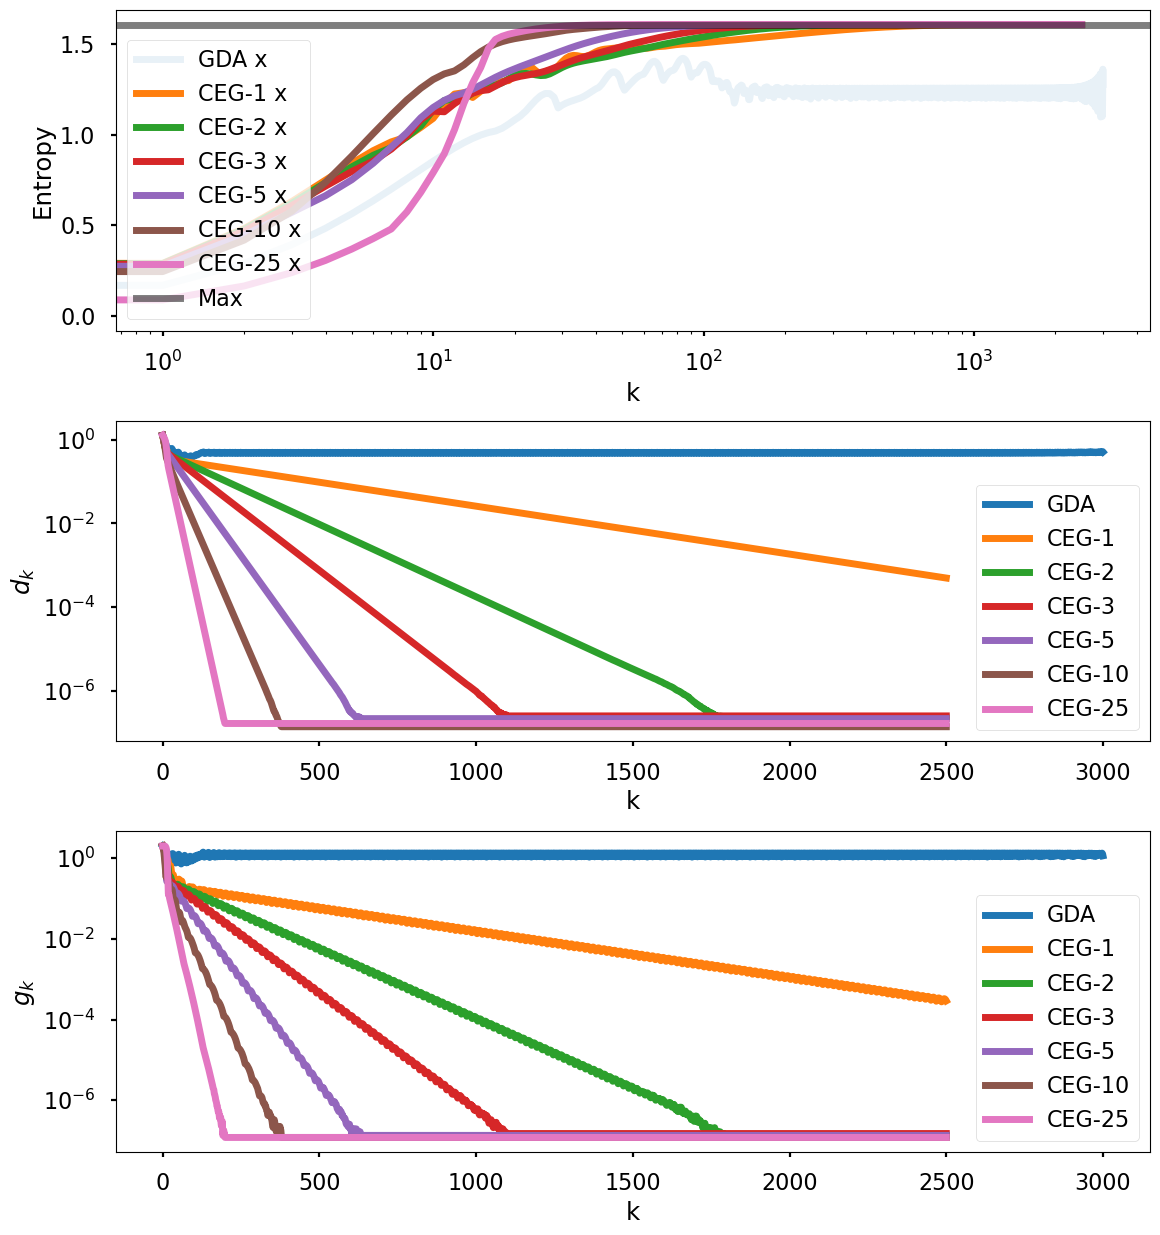

In [44]:
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(3, 1, figsize=(11.7, 1.5 * 8.3))
ax[0].plot(range(len(gda_x_sequence)), entropy(gda_x_sequence, axis=1), lw=5, alpha=0.1, label="GDA x")
ax[1].plot(range(len(gda_x_sequence)), distance_to_opt(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
ax[2].plot(range(len(gda_x_sequence)), duality_gap(gda_x_sequence, gda_y_sequence), lw=5, label="GDA")
for m, ceg_x_sequence, ceg_y_sequence in zip(m_values, ceg_x_sequences, ceg_y_sequences):
    ax[0].plot(range(len(ceg_x_sequence)), entropy(ceg_x_sequence, axis=1), lw=5, label=f"CEG-{m} x")
    ax[1].plot(range(len(ceg_x_sequence)), distance_to_opt(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
    ax[2].plot(range(len(ceg_x_sequence)), duality_gap(ceg_x_sequence, ceg_y_sequence), lw=5, label=f"CEG-{m}")
ax[0].axline((0, np.log(5)), slope=0, color='black', lw=5, alpha=0.5, label="Max")
ax[0].legend()
ax[0].set_xscale("log")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Entropy")
ax[1].legend()
ax[1].set_yscale("log")
ax[1].set_xlabel("k")
ax[1].set_ylabel("$d_k$")
ax[2].legend()
ax[2].set_yscale("log")
ax[2].set_xlabel("k")
ax[2].set_ylabel("$g_k$")
fig.tight_layout()
plt.show()
fig.tight_layout()
plt.show()

**(6)** (5 points) Discuss what you observe for the CEG runs. How do the value of $m$ and the step size influence the convergence and the computation cost? Is there a sweet spot?




As m increases, the convergence is faster but the computation cost is higher. As the step size increase the convergence is faster but the algorithm may diverge.

From below m = 5, the optimum distance and duality gap decreases significantly faster with each increasing m of step 1. 

However, beyond m = 10, the rate of improvement slightly diminishes. So there's little point in forcing further.

The entropy convergence rate remains relatively consistent, except for when m is excessively large. 

Based on 6 values of m tested on CEG, m = 10 appears to provide an optimal balance between convergence speed and computational cost.